#Taller: Ejercicio red neuronal diabetes clasificación


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Importamos nuestro data set con Pandas, de entrenamiento y mostramos los datos del dataset

In [2]:
dataset = pd.read_csv('diabetes_train.csv')

Los datos los trabjamos como arrays y no como Dataset
Por lo que tenemos que convertirlos

In [3]:
dataset.iloc[:, :8].values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [ 13.   , 153.   ,  88.   , ...,  40.6  ,   1.174,  39.   ],
       [ 12.   , 100.   ,  84.   , ...,  30.   ,   0.488,  46.   ],
       [  1.   , 147.   ,  94.   , ...,  49.3  ,   0.358,  27.   ]])

Asignamos las entradas a X

* dataset: Es un objeto que parece ser un conjunto de datos estructurado, como un DataFrame de pandas u otro tipo de estructura tabular.

* .iloc[:, :8]: Utiliza el método iloc de pandas para seleccionar datos basados en sus índices de ubicación. En este caso, : en la primera posición indica que se seleccionarán todas las filas, y :8 en la segunda posición indica que se seleccionarán las columnas desde la primera hasta la octava columna (las columnas 0 a 7 en la indexación basada en cero).

* .values: Convierte el resultado en un array de NumPy. Después de esta operación, X contendrá los valores de las primeras ocho columnas del conjunto de datos.

In [4]:
X_train = dataset.iloc[:, :8].values

Asignamos a Y la variable target
con el -1 lo que tenemos es directamente es el último valor

In [5]:
Y_train = dataset.iloc[:, -1].values

## Escalar los valores para tener datos más homogéneos



In [6]:
# Normalizar características y etiquetas de entrenamiento
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
#Y_train se redimensiona a una columna antes de aplicar la normalización para asegurar que MinMaxScaler pueda operar correctamente.
Y_train_scaled = scaler_Y.fit_transform(Y_train.reshape(-1, 1))

## Dividir los datos en entrenamiento y validación



In [7]:
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(X_train_scaled, Y_train_scaled, test_size=0.2, random_state=42)


Vamos a empezar a diseñar nuestra RED NEURONAL. Hasta ahora solo hemos preparado los datos.


*   Construir y compilar el modelo



In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=12, activation='relu', input_shape=[8]),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

Compilar la Red Neuronal.


*   Utilizamos la función de perdina binary_crossentropy

*   Metrica en clasificación binaria accuracy




In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss="binary_crossentropy",
    metrics=['accuracy']
)


## Entrenar

Agregar la callback de EarlyStopping durante el entrenamiento para detener el proceso si no se observa mejoría en la métrica de validación.

In [10]:
# Entrenar el modelo con conjunto de entrenamiento y validación
print("Comenzando entrenamiento...")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
historial = model.fit(X_train_split, Y_train_split, epochs=1000, batch_size=10, verbose=False, validation_data=(X_test_split, Y_test_split), callbacks=[early_stopping])
print("Modelo entrenado!")


Comenzando entrenamiento...
Modelo entrenado!


## Evaluar el modelo



In [11]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_split, Y_test_split)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

5/5 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7867
Pérdida en el conjunto de prueba: 0.4737451672554016
Precisión en el conjunto de prueba: 0.7866666913032532


Visualización

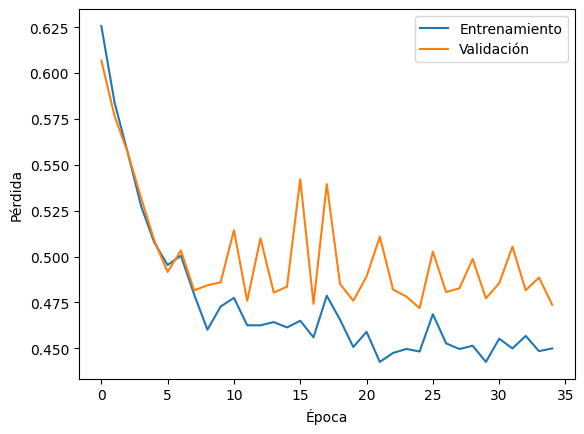

In [12]:
# Visualizar la pérdida a lo largo de las épocas (entrenamiento y validación)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

## Ejecutar una predicción
Invertir la transformación de las predicciones en el conjunto de prueba

In [13]:
# Invertir la transformación de las predicciones en el conjunto de prueba
y_pred_original = scaler_Y.inverse_transform(model.predict(X_test_split))
y_pred = np.round(model.predict(X_test_split))

5/5 [==============================] - 0s 2ms/step


## Graficar los datos de predicciones

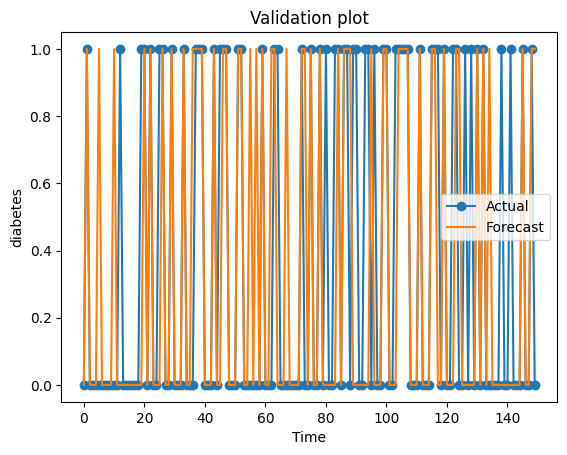

In [14]:
# Plotting
plt.plot(Y_test_split, label='Actual',  marker='o')
plt.plot(y_pred, label='Forecast')

# Formatting
plt.xlabel('Time')
plt.ylabel('diabetes')
plt.title('Validation plot')
plt.legend()

# Evaluar modelo con datos exteriores

1.   Elemento de lista
2.   Elemento de lista



In [15]:
nuevos_datos = pd.read_csv('diabetes_test.csv')

Vamos a optener las 8 variables en entrada


In [16]:
X_val_reales = nuevos_datos.iloc[:, :8].values

In [17]:
Y_val_reales = nuevos_datos.iloc[:, -1].values


## Normalizar los datos

No uses fit_transform en este caso, ya que quieres aplicar la misma escala que aprendiste de los datos de entrenamiento.



In [18]:
# Normalizar características de validación
X_val_esc = scaler_X.transform(X_val_reales)


In [19]:
# Realizar predicciones en datos de validación
predicciones = model.predict(X_val_esc)
redondeo_pred = np.round(predicciones)

1/1 [==============================] - 0s 28ms/step


## Invertir la transformación de las predicciones para obtener valores en la escala original


In [20]:
# Invertir la transformación de las predicciones para obtener valores en la escala original
redondeo_pred_originales = scaler_Y.inverse_transform(redondeo_pred)

## Representación gráfica

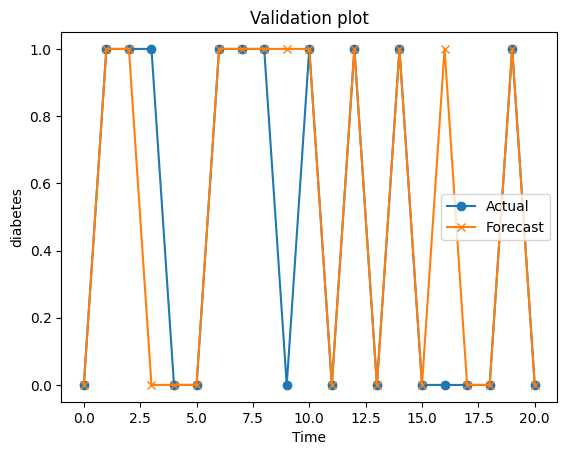

In [21]:
# Visualizar resultados
plt.plot(Y_val_reales, label='Actual', marker='o')
plt.plot(redondeo_pred_originales, label='Forecast', marker='x')
plt.xlabel('Time')
plt.ylabel('diabetes')
plt.title('Validation plot')
plt.legend()
plt.show()

## Gráfico de dispersión para comparar las etiquetas reales y las predicciones:

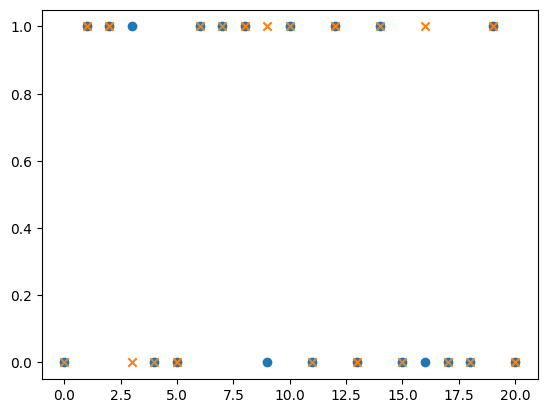

In [22]:
plt.scatter(range(len(Y_val_reales)), Y_val_reales, label='Actual', marker='o')
plt.scatter(range(len(redondeo_pred)), redondeo_pred, label='Forecast', marker='x')




## Evaluación de rendimiento del modelo


In [23]:
# Evaluación del rendimiento en los nuevos datos
accuracy_val = accuracy_score(Y_val_reales, redondeo_pred)
report_val = classification_report(Y_val_reales, redondeo_pred)
print(f"Precisión en los nuevos datos: {accuracy_val}")
print("Reporte de clasificación en los nuevos datos:\n", report_val)

Precisión en los nuevos datos: 0.8571428571428571
Reporte de clasificación en los nuevos datos:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21

